In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ideal = pd.read_csv('data/ideal.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [3]:
ideal

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19.5,0.605540,0.795815,10.605540,5.795815,-10.605540,-0.605540,-0.947580,-0.117020,1.591630,...,39.302770,-38.602093,2.970414,-0.012422,12.970414,5.273000,-5.273000,0.240949,0.605540,0.714434
396,19.6,0.681964,0.731386,10.681964,5.731386,-10.681964,-0.681964,-0.930426,0.774356,1.462772,...,39.540980,-38.834310,2.975530,-0.012438,12.975530,5.278115,-5.278115,0.249389,0.681964,0.667902
397,19.7,0.751573,0.659649,10.751574,5.659649,-10.751574,-0.751573,-0.910947,-0.994669,1.319299,...,39.775787,-39.070175,2.980619,-0.012453,12.980619,5.283204,-5.283204,0.247887,0.751573,0.612840
398,19.8,0.813674,0.581322,10.813674,5.581322,-10.813674,-0.813674,-0.889191,0.612391,1.162644,...,40.006836,-39.309338,2.985682,-0.012469,12.985682,5.288267,-5.288267,0.236503,0.813674,0.549129


In [4]:
test

,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054
...,...,...
95,-1.9,-4.036904
96,12.2,-0.010358
97,16.5,-33.964134
98,5.3,-10.291622


In [5]:
train

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076
...,...,...,...,...,...
395,19.5,-38.254158,39.661987,19.536741,0.695158
396,19.6,-39.106945,39.067880,19.840752,0.638423
397,19.7,-38.926495,40.211475,19.516634,0.109105
398,19.8,-39.276672,40.038870,19.377943,0.189025


In [6]:
def find_deviation_metrics(s1, s2):
    deviations = s1.values - s2.values
    return np.square(deviations).sum(), np.abs(deviations).max()

In [7]:
comparisons = []
for train_col, train_val in train.items():
    for ideal_col, ideal_val in ideal.items():
        if train_col != 'x' and ideal_col != 'x':
            sum_squared_error, max_deviation = find_deviation_metrics(train_val, ideal_val)
            comparisons.append(dict(
                train_col = train_col,
                ideal_col = ideal_col,
                squared_error = sum_squared_error,
                max_deviation = max_deviation
            ))

comparisions_df = pd.DataFrame(comparisons)

In [8]:
comparisions_df

,train_col,ideal_col,squared_error,max_deviation
0,y1,y1,212588.870331,40.912744
1,y1,y2,212938.547403,40.222120
2,y1,y3,251709.283437,50.592578
3,y1,y4,222690.320089,45.222120
4,y1,y5,254597.962479,49.399526
...,...,...,...,...
195,y4,y46,8509.795446,26.696971
196,y4,y47,8561.791176,26.475933
197,y4,y48,31.963434,0.499742
198,y4,y49,232.391004,1.590369


In [9]:
best_fits = []
for train_col in comparisions_df['train_col'].unique():
    this_col = comparisions_df.query('train_col == @train_col')
    arg_min = np.argmin(this_col['squared_error'].values)
    best_fits.append(dict(
        train_col = train_col,
        ideal_col = this_col.iloc[arg_min]['ideal_col'],
        squared_error = this_col.iloc[arg_min]['squared_error'],
        max_deviation = this_col.iloc[arg_min]['max_deviation']
    ))
best_fit_df = pd.DataFrame(best_fits)

In [10]:
best_fit_df

,train_col,ideal_col,squared_error,max_deviation
0,y1,y42,34.246594,0.495968
1,y2,y41,35.601847,0.497703
2,y3,y11,29.861830,0.498936
3,y4,y48,31.963434,0.499742


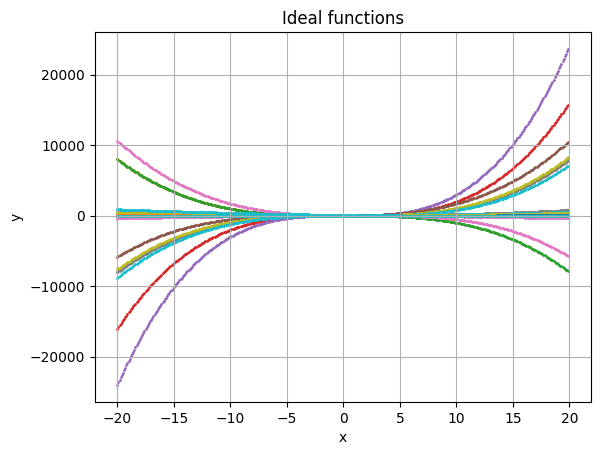

In [11]:
for col, data in ideal.items():
    if col != 'x':
        plt.scatter(ideal['x'], data, label = col, s = 1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ideal functions')
# plt.legend()
plt.show()

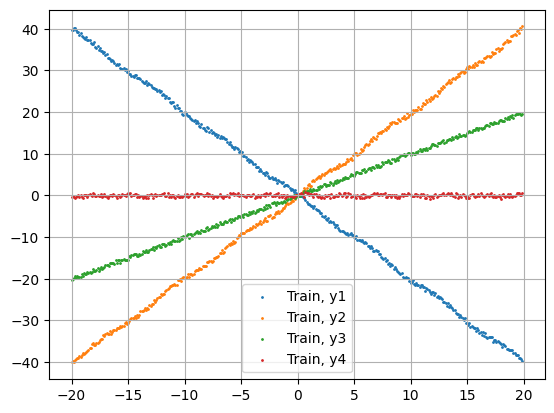

In [12]:
for col, data in train.items():
    if col != 'x':
        plt.scatter(train['x'], data, label = f'Train, {col}', s = 1)

# for col in best_fit_df['ideal_col'].unique():
#     plt.plot(ideal['x'], ideal[col], label = f'Ideal, {col}')
plt.grid()
plt.legend()
plt.show()

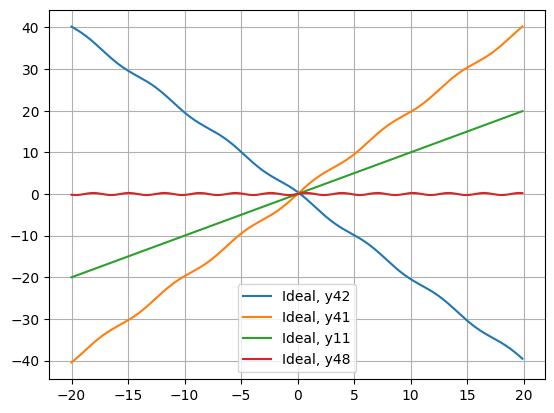

In [13]:
# for col, data in train.items():
#     if col != 'x':
#         plt.scatter(train['x'], data, label = f'Train, {col}', s = 1)

for col in best_fit_df['ideal_col'].unique():
    plt.plot(ideal['x'], ideal[col], label = f'Ideal, {col}')
plt.grid()
plt.legend()
plt.show()

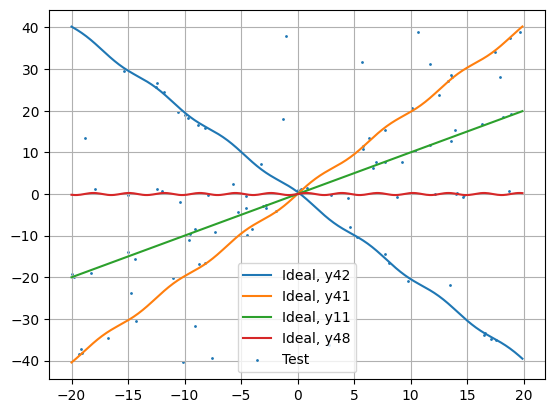

In [14]:
for col in best_fit_df['ideal_col'].unique():
    plt.plot(ideal['x'], ideal[col], label = f'Ideal, {col}')

plt.scatter(test['x'], test['y'], label = 'Test', s = 1)

plt.grid()
plt.legend()
plt.show()

In [15]:
def check_is_close_to_ideal(row, ideal_func):
    test_x = row['x']
    test_y = row['y']
    distances = np.hypot((ideal['x'].values - test_x), (ideal[ideal_func].values - test_y))
    max_deviation = best_fit_df.query('ideal_col == @ideal_func').iloc[0]['max_deviation']
    min_distance = distances.min()
    return min_distance <= max_deviation * np.sqrt(2)

In [16]:
test

,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054
...,...,...
95,-1.9,-4.036904
96,12.2,-0.010358
97,16.5,-33.964134
98,5.3,-10.291622


In [17]:
test['is_close_to_y11'] = test.apply(lambda row: check_is_close_to_ideal(row, 'y11'), axis = 1)
test['is_close_to_y42'] = test.apply(lambda row: check_is_close_to_ideal(row, 'y42'), axis = 1)
test['is_close_to_y41'] = test.apply(lambda row: check_is_close_to_ideal(row, 'y41'), axis = 1)
test['is_close_to_y48'] = test.apply(lambda row: check_is_close_to_ideal(row, 'y48'), axis = 1)

In [18]:
test['num_func'] = np.count_nonzero(test[['is_close_to_y11', 'is_close_to_y42', 'is_close_to_y41', 'is_close_to_y48']].values, axis = 1)
test['has_func'] = test['num_func'] > 0

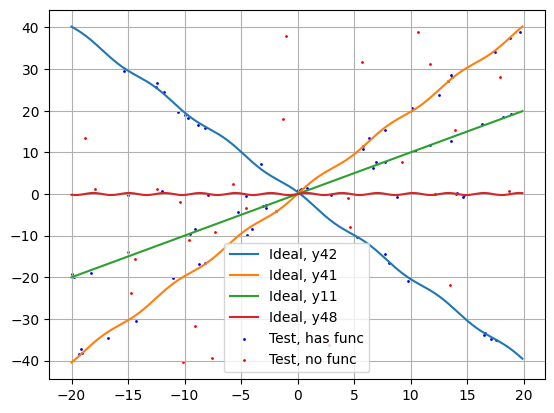

In [19]:
for col in best_fit_df['ideal_col'].unique():
    plt.plot(ideal['x'], ideal[col], label = f'Ideal, {col}')

plt.scatter(test.query('has_func')['x'], test.query('has_func')['y'], label = 'Test, has func', color = 'blue', s = 1)
plt.scatter(test.query('has_func==False')['x'], test.query('has_func==False')['y'], label = 'Test, no func', color = 'red', s = 1)

plt.grid()
plt.legend()
plt.show()

In [20]:
test['has_func'].value_counts()

has_func
True     73
False    27
Name: count, dtype: int64

In [21]:
arr = np.array([True, False, True, True])
np.count_nonzero(arr)

3

In [23]:
test.sort_values('num_func')

,x,y,is_close_to_y11,is_close_to_y42,is_close_to_y41,is_close_to_y48,num_func,has_func
99,1.790000e+01,28.078455,False,False,False,False,0,False
10,-7.600000e+00,-39.495400,False,False,False,False,0,False
82,1.870000e+01,0.832272,False,False,False,False,0,False
74,-1.500000e+01,-13.989205,False,False,False,False,0,False
75,-1.300000e+00,17.948320,False,False,False,False,0,False
...,...,...,...,...,...,...,...,...
45,-9.100000e+00,-8.293134,True,False,False,False,1,True
43,-7.900000e+00,-0.218000,False,False,False,True,1,True
71,2.842171e-13,1.026143,False,True,True,False,2,True
5,8.000000e-01,1.426456,True,False,True,False,2,True
